In [1]:
import sympy as sp
from sympy import print_latex
sp.init_printing()

## Define symbols

In [3]:
phi, psi, theta, eta, psi1, theta1, phi1 = sp.symbols('phi psi theta eta psi_1 theta_1 phi_1')
alpha, beta, gamma = sp.symbols('alpha beta gamma')

## Nautical Angles

Rotation for nautical angles along x-axis (angle $\gamma$)

In [6]:
Rna_gamma_x = sp.Matrix([[1, 0, 0],
                [0, sp.cos(gamma), -sp.sin(gamma)],
                [0, sp.sin(gamma), sp.cos(gamma)]])

Rotation for nautical angles along y-axis (angle $\beta$)

In [8]:
Rna_beta_y = sp.Matrix([[sp.cos(beta), 0, sp.sin(beta)],
                [0, 1, 0],
                [-sp.sin(beta), 0, sp.cos(beta)]])

Rotation for nautical angles along z-axis (angle $\alpha$)

In [10]:
Rna_alpha_z = sp.Matrix([[sp.cos(alpha), -sp.sin(alpha), 0],
                [sp.sin(alpha), sp.cos(alpha), 0],
                [0, 0, 1]])

In [11]:
Rna_tot = Rna_alpha_z * Rna_beta_y * Rna_gamma_x

In [12]:
Rna_tot

In [13]:
print_latex(Rna_tot)

\left[\begin{matrix}\cos{\left(\alpha \right)} \cos{\left(\beta \right)} & - \sin{\left(\alpha \right)} \cos{\left(\gamma \right)} + \sin{\left(\beta \right)} \sin{\left(\gamma \right)} \cos{\left(\alpha \right)} & \sin{\left(\alpha \right)} \sin{\left(\gamma \right)} + \sin{\left(\beta \right)} \cos{\left(\alpha \right)} \cos{\left(\gamma \right)}\\\sin{\left(\alpha \right)} \cos{\left(\beta \right)} & \sin{\left(\alpha \right)} \sin{\left(\beta \right)} \sin{\left(\gamma \right)} + \cos{\left(\alpha \right)} \cos{\left(\gamma \right)} & \sin{\left(\alpha \right)} \sin{\left(\beta \right)} \cos{\left(\gamma \right)} - \sin{\left(\gamma \right)} \cos{\left(\alpha \right)}\\- \sin{\left(\beta \right)} & \sin{\left(\gamma \right)} \cos{\left(\beta \right)} & \cos{\left(\beta \right)} \cos{\left(\gamma \right)}\end{matrix}\right]


In [14]:
R1 = sp.Matrix([[sp.cos(theta), 0, sp.sin(theta)],
                [0, 1, 0],
                [-sp.sin(theta), 0, sp.cos(theta)]])

In [15]:
R2 = sp.Matrix([[1, 0, 0],
                [0, sp.cos(eta), -sp.sin(eta)],
                [0, sp.sin(eta), sp.cos(eta)]])

## ANBA

Rotation for anba convention along z-axis ($\psi$ angle) **plane orientation**

In [18]:
Rpo = sp.Matrix([[sp.cos(psi), -sp.sin(psi), 0],
                [sp.sin(psi), sp.cos(psi), 0],
                [0, 0, 1]])

In [19]:
print_latex(Rpo)

\left[\begin{matrix}\cos{\left(\psi \right)} & - \sin{\left(\psi \right)} & 0\\\sin{\left(\psi \right)} & \cos{\left(\psi \right)} & 0\\0 & 0 & 1\end{matrix}\right]


Rotation for anba convention along z-axis ($\phi$ angle) **fiber orientation**

In [21]:
Rfo = sp.Matrix([[sp.cos(phi), 0, sp.sin(phi)],
                [0, 1, 0],
                [-sp.sin(phi), 0, sp.cos(phi)]])

In [22]:
print_latex(Rfo)

\left[\begin{matrix}\cos{\left(\phi \right)} & 0 & \sin{\left(\phi \right)}\\0 & 1 & 0\\- \sin{\left(\phi \right)} & 0 & \cos{\left(\phi \right)}\end{matrix}\right]


Total orientation for **ANBA**

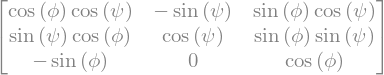

In [24]:
Ranba = Rpo*Rfo
Ranba

In [25]:
print_latex(Ranba)

\left[\begin{matrix}\cos{\left(\phi \right)} \cos{\left(\psi \right)} & - \sin{\left(\psi \right)} & \sin{\left(\phi \right)} \cos{\left(\psi \right)}\\\sin{\left(\psi \right)} \cos{\left(\phi \right)} & \cos{\left(\psi \right)} & \sin{\left(\phi \right)} \sin{\left(\psi \right)}\\- \sin{\left(\phi \right)} & 0 & \cos{\left(\phi \right)}\end{matrix}\right]


In [26]:
#Rna_tot.subs({gamma:sp.pi/2, alpha:sp.pi+psi, beta:3/2*sp.pi-phi})

## ANBA re-oriented

We then consider the ANBA rotations as they were performed in the 3D reference frame: that is with *bam axis* along x.

- we first perform the **plane orientation** along *x* (Rpo1)
- then we perfotm the **fiber orientation** along the local *z* (Rfo1)

In [28]:
Rpo1 = sp.Matrix([[1, 0, 0],
                [0, sp.cos(psi), -sp.sin(psi)],
                [0, sp.sin(psi), sp.cos(psi)]])

Rfo1 = sp.Matrix([[sp.cos(phi), -sp.sin(phi), 0],
                  [sp.sin(phi), sp.cos(phi), 0],
                  [0, 0, 1]])

New total **ANBA** orientation

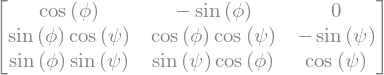

In [30]:
Ranba1 = Rpo1*Rfo1
Ranba1

In [31]:
print_latex(Ranba1)

\left[\begin{matrix}\cos{\left(\phi \right)} & - \sin{\left(\phi \right)} & 0\\\sin{\left(\phi \right)} \cos{\left(\psi \right)} & \cos{\left(\phi \right)} \cos{\left(\psi \right)} & - \sin{\left(\psi \right)}\\\sin{\left(\phi \right)} \sin{\left(\psi \right)} & \sin{\left(\psi \right)} \cos{\left(\phi \right)} & \cos{\left(\psi \right)}\end{matrix}\right]


## Simple cases

To go from **ANBA** (*re-oriented*) to **nautical angles**

### Case 1: $\psi = 0$

In [34]:
Ranba1.subs({psi:0})

In [35]:
Rna_tot

Solutions:
$$
\begin{cases}
\sin(\beta) &= 0 \\
\sin(\gamma)\cos(\beta) &= 0 \\
\cos(\beta)\cos(\gamma) &= 1 \\
\cos(\alpha)\cos(\beta) &= \cos(\phi) \\
\sin(\alpha)\cos(\beta) &= \sin(\phi) \\
\end{cases}
$$

Possible solution:

$$
\begin{cases}
\alpha &= \phi \\
\beta &= 0 \\
\gamma &= 0 \\
\end{cases}
$$

In [37]:
Rna_tot.subs({ beta:0, gamma:0})

### Case 2: $\psi = \pi$

In [39]:
Ranba1.subs({psi:sp.pi})

Solutions:
$$
\begin{cases}
\sin(\beta) &= 0 \\
\sin(\gamma)\cos(\beta) &= 0 \\
\cos(\beta)\cos(\gamma) &= -1 \\
\cos(\alpha)\cos(\beta) &= \cos(\phi) \\
\sin(\alpha)\cos(\beta) &= \sin(\phi) \\
\end{cases}
$$

Possible solution:

$$
\begin{cases}
\alpha &= -\phi \\
\beta &= 0 \\
\gamma &= \pi \\
\end{cases}
$$

In [41]:
Rna_tot.subs({ beta:0, gamma:sp.pi})

### Case 3: $\psi = \frac{\pi}{2}$

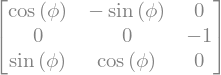

In [43]:
Ranba1.subs({psi:sp.pi/2})

In [44]:
Rna_tot

Solutions:
$$
\begin{cases}
-\sin(\beta) &= \sin(\phi) \\
\sin(\gamma)\cos(\beta) &= \cos(\phi) \\
\cos(\beta)\cos(\gamma) &= 0 \\
\cos(\alpha)\cos(\beta) &= \cos(\phi) \\
\sin(\alpha)\cos(\beta) &= 0 \\
\end{cases}
$$

Possible solution:

$$
\begin{cases}
\alpha &= 0 \\
\beta &= -\phi \\
\gamma &= \frac{\pi}{2} \\
\end{cases}
$$

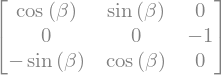

In [46]:
Rna_tot.subs({ alpha:0, gamma:sp.pi/2})

### Case 4: $\psi = -\frac{\pi}{2}$

In [48]:
Ranba1.subs({psi: -sp.pi/2})

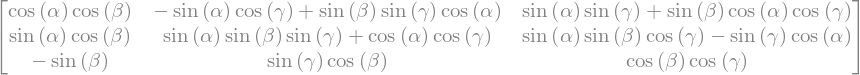

In [49]:
Rna_tot

Solutions:
$$
\begin{cases}
-\sin(\beta) &= -\sin(\phi) \\
\sin(\gamma)\cos(\beta) &= -\cos(\phi) \\
\cos(\beta)\cos(\gamma) &= 0 \\
\cos(\alpha)\cos(\beta) &= \cos(\phi) \\
\sin(\alpha)\cos(\beta) &= 0 \\
\end{cases}
$$

Possible solution:

$$
\begin{cases}
\alpha &= 0 \\
\beta &= \phi \\
\gamma &= -\frac{\pi}{2} \\
\end{cases}
$$

In [51]:
Rna_tot.subs({alpha:0, gamma:-sp.pi/2})

# Euler Angles

In [53]:
Rprec = sp.Matrix([[sp.cos(psi1), -sp.sin(psi1), 0],
                [sp.sin(psi1), sp.cos(psi1), 0],
                [0, 0, 1]])
Rnut = sp.Matrix([[1, 0, 0],
                [0, sp.cos(theta1), -sp.sin(theta1)],
                [0, sp.sin(theta1), sp.cos(theta1)]])

Rrot= sp.Matrix([[sp.cos(phi1), -sp.sin(phi1), 0],
                [sp.sin(phi1), sp.cos(phi1), 0],
                [0, 0, 1]])

Reuler = Rprec*Rnut*Rrot
Reuler

In [54]:
print_latex(Reuler)

\left[\begin{matrix}- \sin{\left(\phi_{1} \right)} \sin{\left(\psi_{1} \right)} \cos{\left(\theta_{1} \right)} + \cos{\left(\phi_{1} \right)} \cos{\left(\psi_{1} \right)} & - \sin{\left(\phi_{1} \right)} \cos{\left(\psi_{1} \right)} - \sin{\left(\psi_{1} \right)} \cos{\left(\phi_{1} \right)} \cos{\left(\theta_{1} \right)} & \sin{\left(\psi_{1} \right)} \sin{\left(\theta_{1} \right)}\\\sin{\left(\phi_{1} \right)} \cos{\left(\psi_{1} \right)} \cos{\left(\theta_{1} \right)} + \sin{\left(\psi_{1} \right)} \cos{\left(\phi_{1} \right)} & - \sin{\left(\phi_{1} \right)} \sin{\left(\psi_{1} \right)} + \cos{\left(\phi_{1} \right)} \cos{\left(\psi_{1} \right)} \cos{\left(\theta_{1} \right)} & - \sin{\left(\theta_{1} \right)} \cos{\left(\psi_{1} \right)}\\\sin{\left(\phi_{1} \right)} \sin{\left(\theta_{1} \right)} & \sin{\left(\theta_{1} \right)} \cos{\left(\phi_{1} \right)} & \cos{\left(\theta_{1} \right)}\end{matrix}\right]
